In [3]:
pip install pandas matplotlib seaborn scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Frequency table
cat_counts = df['category'].value_counts()
cat_counts.head(10)


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [4]:
# Top 5
top5 = cat_counts.nlargest(5)
print("Top 5 Categories:\n", top5)


Top 5 Categories:
 category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


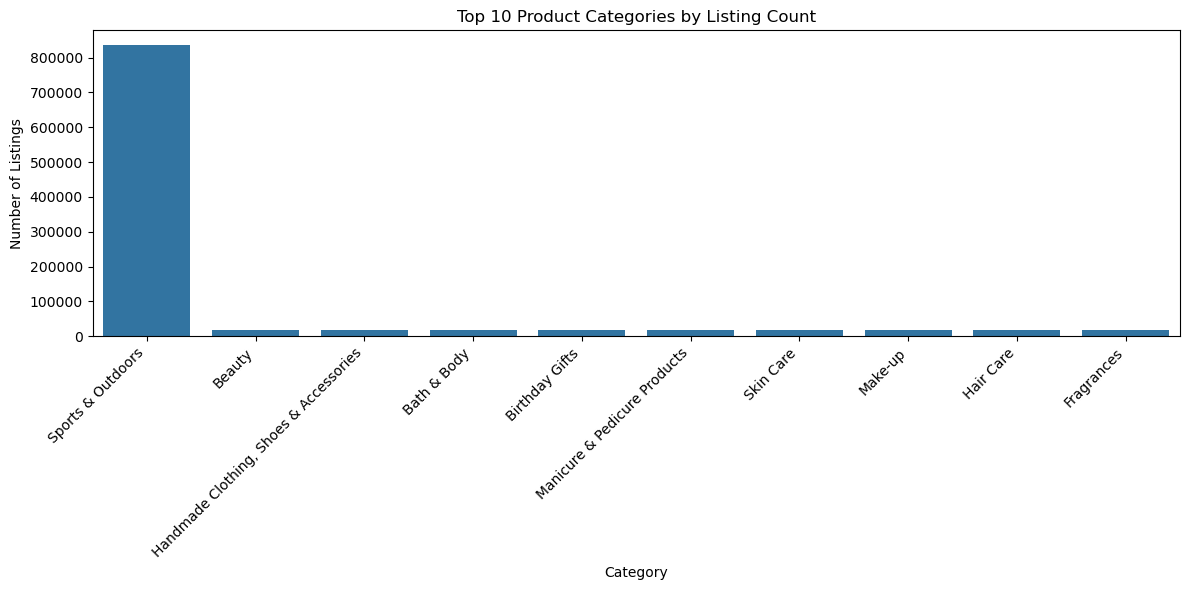

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x=cat_counts.index[:10], y=cat_counts.values[:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Product Categories by Listing Count')
plt.ylabel('Number of Listings')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


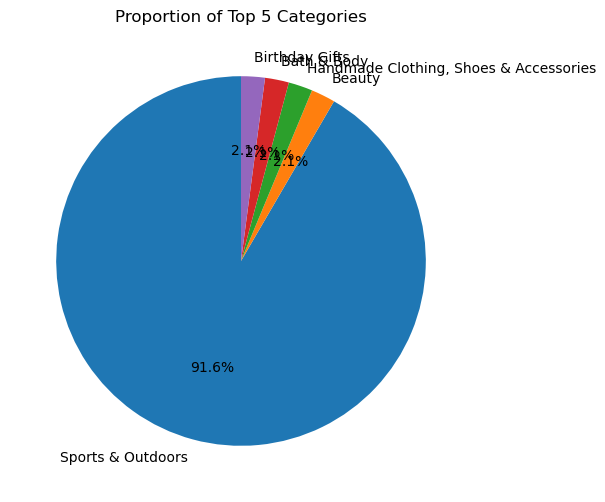

In [6]:
plt.figure(figsize=(6,6))
top5.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Proportion of Top 5 Categories')
plt.show()


In [7]:
price = df['price'].dropna()
mean_price = price.mean()
median_price = price.median()
mode_price = price.mode().iloc[0]

print(f"Mean: £{mean_price:.2f}")
print(f"Median: £{median_price:.2f}")
print(f"Mode: £{mode_price:.2f}")


Mean: £89.24
Median: £19.09
Mode: £9.99


In [8]:
var_price = price.var()
std_price = price.std()
price_range = price.max() - price.min()
iqr_price = stats.iqr(price)

print(f"Variance: {var_price:.2f}")
print(f"Std Dev: {std_price:.2f}")
print(f"Range: £{price_range:.2f}")
print(f"IQR: £{iqr_price:.2f}")


Variance: 119445.49
Std Dev: 345.61
Range: £100000.00
IQR: £36.00


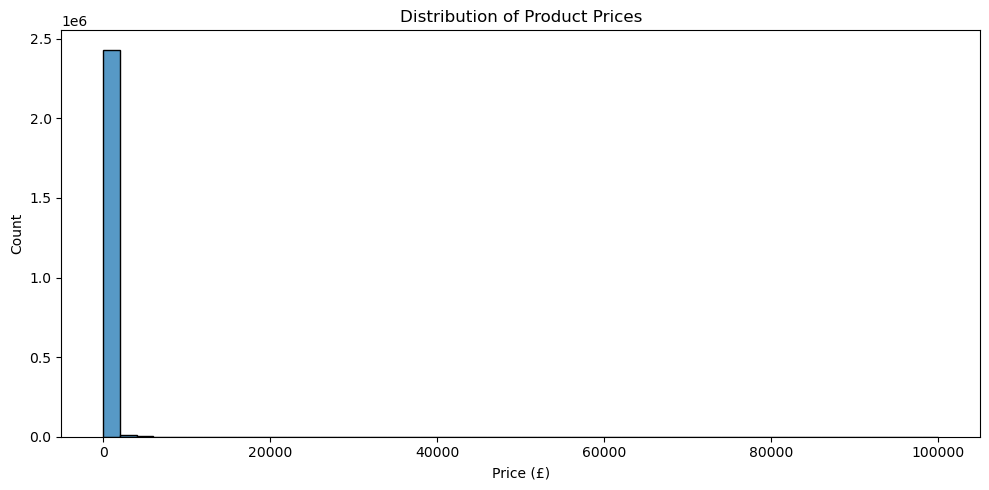

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(price, bins=50, kde=False)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


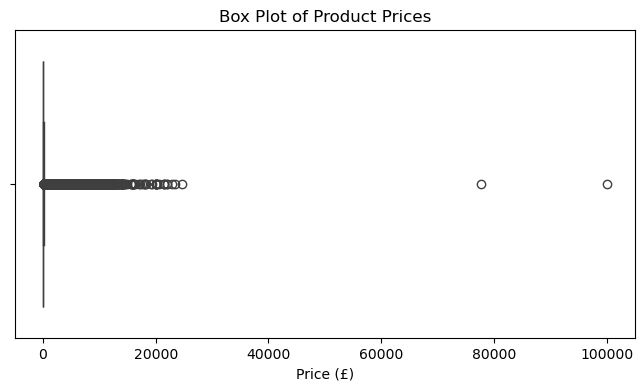

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x=price)
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')
plt.show()


In [14]:
stars = df['stars'].dropna()
print("Mean:", stars.mean())
print("Median:", stars.median())
print("Mode:", stars.mode().iloc[0])


Mean: 2.152836472966065
Median: 0.0
Mode: 0.0


In [15]:
print("Variance:", stars.var())
print("Std Dev:", stars.std())
print("IQR:", stats.iqr(stars))


Variance: 4.81743402976196
Std Dev: 2.1948653785054697
IQR: 4.4


In [17]:
print("Skewness:", stats.skew(stars))
print("Kurtosis:", stats.kurtosis(stars))


Skewness: 0.08120730776283354
Kurtosis: -1.926004642549839


In [21]:
import numpy as np


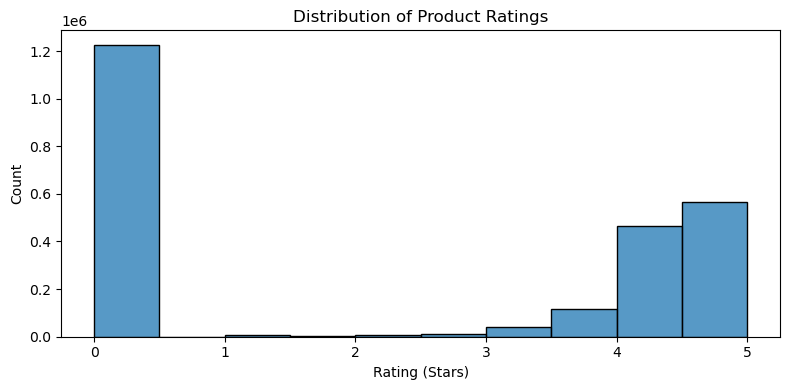

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(stars, bins=np.arange(0,5.5,0.5), kde=False)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
